In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from tqdm.notebook import tqdm

In [2]:
path = '../data/genes/'
os.chdir(path)
files = glob.glob('*.csv')
print(files)

['EX5261.csv', 'EX5342.csv', 'EX5347.csv', 'EX5348.csv', 'EX5349.csv', 'EX5364.csv', 'EX5365.csv', 'EX5428.csv', 'EX5429.csv', 'EX5431.csv', 'EX5432.csv', 'EX5433.csv', 'EX5434.csv', 'EX5435.csv', 'EX5436.csv', 'EX5437.csv', 'EX5438.csv', 'EX5441.csv', 'EX5443.csv', 'EX5445.csv', 'EX5526.csv', 'EX5527.csv', 'EX5528.csv', 'EX5529.csv', 'EX5530.csv', 'EX5531.csv', 'EX5533.csv', 'EX5539.csv', 'EX5540.csv', 'EX5541.csv', 'EX5542.csv', 'EX5544.csv', 'EX5545.csv', 'EX5555.csv']


In [3]:
# function to isolate no. of mutations
def mut_count(file, chr_list):

    # created the dataframe
    df = pd.read_csv(file, low_memory=False)
    df = df.iloc[:, 77]  # only the chr column
    name = file[:-4]     # name of the input file

     
    chr_count = []
    chr_values = df.value_counts()
    chr_names = df.unique().tolist()

    # counts no. of mutation in each chr
    for gene in chr_list:
        if gene in chr_names:
            chr_count.append(chr_values[gene])
        else:
            chr_count.append(0)

    # creates the mutation count dataframe
    dic = {'Chromosome': chr_list, name: chr_count}
    df_chr = pd.DataFrame.from_dict(dic)

    return(df_chr)

In [4]:
df = pd.read_csv(files[0])
chr_names_list = df.iloc[:, 77].unique().tolist()

# start col
result = mut_count(files[0], chr_names_list)

#merging results
for file in tqdm(files[1:]):
    tmp = mut_count(file, chr_names_list)
    result = pd.concat([result, tmp.iloc[:,1]], axis=1)
    
#df.to_csv('mut_count_all.csv', index=False)
result.to_csv('mut_count_all2.csv', index=False)
result 

  0%|          | 0/33 [00:00<?, ?it/s]

In [47]:
#result.iloc[:,1:].mean().mean()
result.iloc[:,1:].max().max()

15918

In [49]:
res_norm = result.iloc[:,1:]/result.iloc[:,1:].max().max()

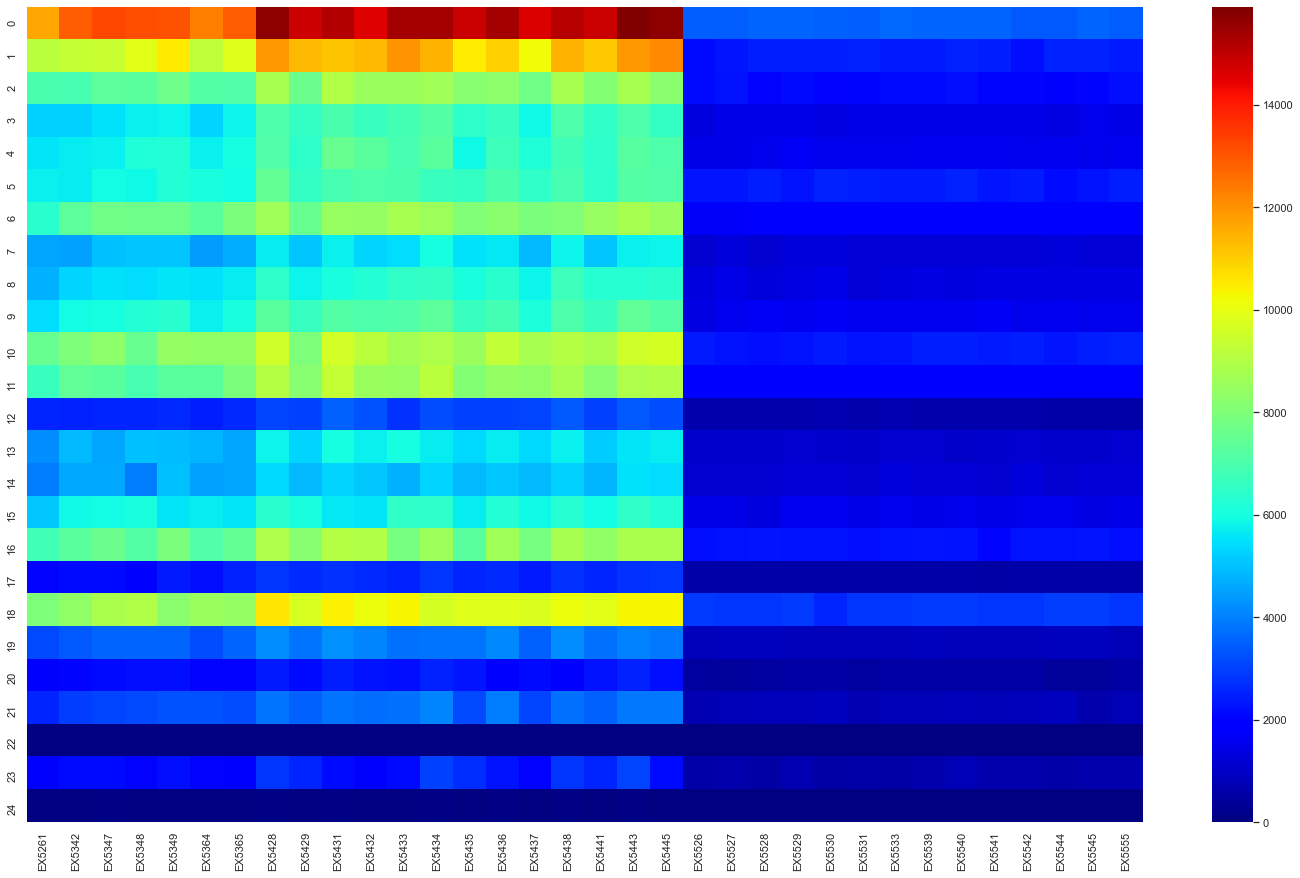

In [51]:

sns.set(rc={'figure.figsize':(25,15)})
ax = sns.heatmap(result.iloc[:,1:], cmap='jet')
#res_norm = result.iloc[:,1:]/result.iloc[:,1:].max().max()
#ax = sns.heatmap(res_norm, cmap='jet')

In [1]:
fig = px.imshow(result.iloc[:,1:])
fig.show()

NameError: name 'px' is not defined

In [ ]:
for file in files:
    new_file = file.replace('.merged', '')
    os.rename(file, new_file)